The goals / steps of this project are the following:
* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


### Importing Packages

In [48]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import moviepy
import math
import glob
import os
import pickle
from moviepy.editor import VideoFileClip
from IPython.display import HTML

%matplotlib qt
%matplotlib inline

### Computing camera calibration matrix using chessboard images

This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


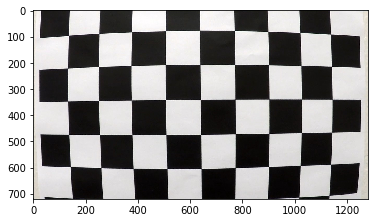

In [31]:
image = mpimg.imread('camera_cal/calibration1.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

In [47]:
output_directory = 'output_images/corners_drawn/'
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')


# Step through the list and search for chessboard corners
for idx,fname in enumerate(images):

    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        image_name=os.path.split(fname)[1]
        cv2.imwrite(output_directory+image_name, img)
        print(fname)

camera_cal/calibration15.jpg
camera_cal/calibration19.jpg
camera_cal/calibration11.jpg
camera_cal/calibration6.jpg
camera_cal/calibration14.jpg
camera_cal/calibration18.jpg
camera_cal/calibration2.jpg
camera_cal/calibration20.jpg
camera_cal/calibration8.jpg
camera_cal/calibration9.jpg
camera_cal/calibration3.jpg
camera_cal/calibration10.jpg
camera_cal/calibration17.jpg
camera_cal/calibration13.jpg
camera_cal/calibration12.jpg
camera_cal/calibration16.jpg
camera_cal/calibration7.jpg


### Apply a distortion correction to raw images.

### Question 1. 
_Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image_


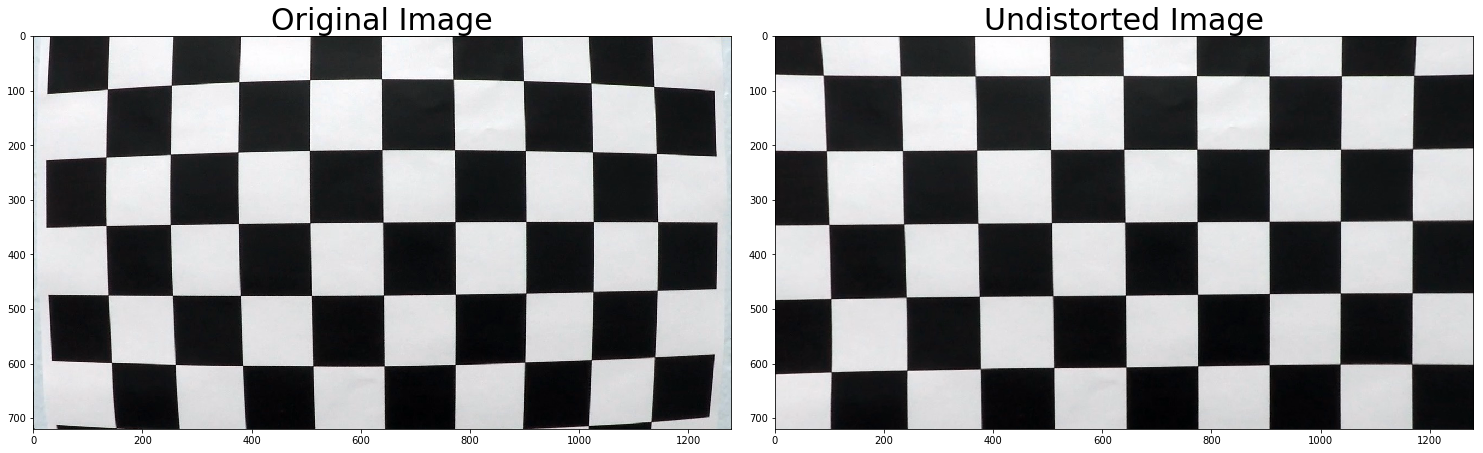

In [36]:
# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])


def cal_undistort(img, objpoints, imgpoints):
    '''
     Write a function that takes an image, object points, and image points performs the camera calibration, 
     image distortion correction and returns the undistorted image
    '''
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [39]:
# Save the camera calibration results
undistort_pickle = {}
undistort_pickle["mtx"] = mtx
undistort_pickle["dist"] = dist
undistort_pickle["rvecs"] = rvecs
undistort_pickle["tvecs"] = tvecs
pickle.dump(undistort_pickle, open( "camera_undistort_pickle.p", "wb" ) )

In [49]:
output_directory = 'output_images/undistorted_chessboard_images/'
images = glob.glob('camera_cal/calibration*.jpg')

with open('camera_undistort_pickle.p', mode='rb') as f:
    dist_pickle = pickle.load(f)
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]
# Visualize undistortion on test images

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    image_name=os.path.split(fname)[1]
    write_name = output_directory+'undistorted_'+image_name
    cv2.imwrite(write_name,dst)
    print(write_name)

output_images/undistorted_chessboard_images/undistorted_calibration15.jpg
output_images/undistorted_chessboard_images/undistorted_calibration19.jpg
output_images/undistorted_chessboard_images/undistorted_calibration11.jpg
output_images/undistorted_chessboard_images/undistorted_calibration6.jpg
output_images/undistorted_chessboard_images/undistorted_calibration14.jpg
output_images/undistorted_chessboard_images/undistorted_calibration18.jpg
output_images/undistorted_chessboard_images/undistorted_calibration1.jpg
output_images/undistorted_chessboard_images/undistorted_calibration2.jpg
output_images/undistorted_chessboard_images/undistorted_calibration20.jpg
output_images/undistorted_chessboard_images/undistorted_calibration8.jpg
output_images/undistorted_chessboard_images/undistorted_calibration9.jpg
output_images/undistorted_chessboard_images/undistorted_calibration3.jpg
output_images/undistorted_chessboard_images/undistorted_calibration10.jpg
output_images/undistorted_chessboard_images/

### Question2  
_Provide an example of a distortion-corrected image._

To demonstrate this step, I will describe how I apply the distortion correction to one of the test images like this one: 

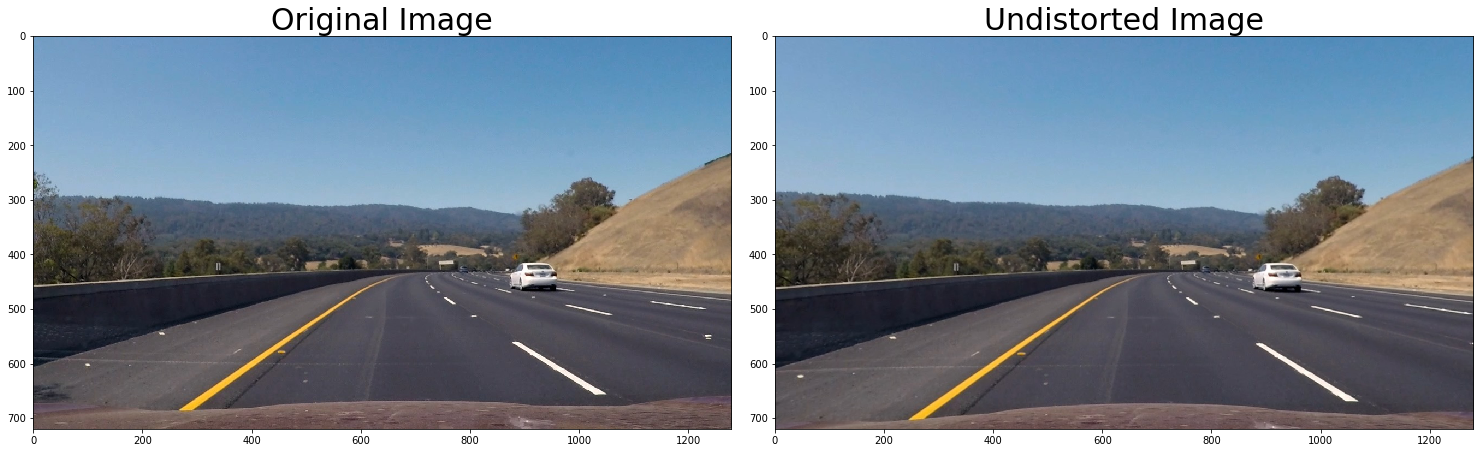

In [46]:
img = mpimg.imread('test_images/test3.jpg')
img_size = (img.shape[1], img.shape[0])

undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Use color transforms, gradients, etc., to create a thresholded binary image.

In [50]:
# Remove camera distortion from the test images
output_directory = 'output_images/undistorted_test_images/'
images = glob.glob('test_images/*.jpg')

with open('camera_undistort_pickle.p', mode='rb') as f:
    dist_pickle = pickle.load(f)
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]
# Visualize undistortion on test images

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    image_name=os.path.split(fname)[1]
    write_name = output_directory+'undistorted_'+image_name
    cv2.imwrite(write_name,dst)
    print(write_name)

output_images/undistorted_test_images/undistorted_straight_lines2.jpg
output_images/undistorted_test_images/undistorted_test5.jpg
output_images/undistorted_test_images/undistorted_test4.jpg
output_images/undistorted_test_images/undistorted_test2.jpg
output_images/undistorted_test_images/undistorted_test1.jpg
output_images/undistorted_test_images/undistorted_test6.jpg
output_images/undistorted_test_images/undistorted_straight_lines1.jpg
output_images/undistorted_test_images/undistorted_test3.jpg


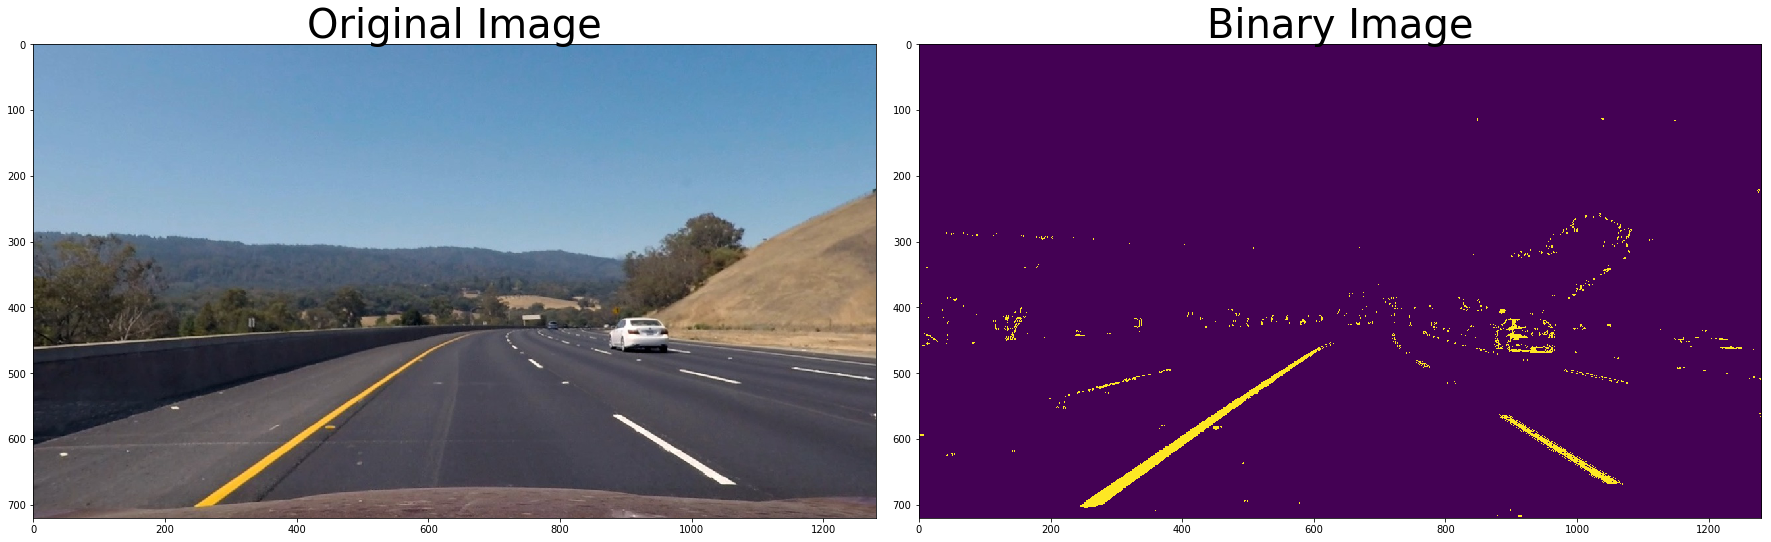

In [55]:
image = mpimg.imread('output_images/undistorted_test_images/undistorted_test3.jpg')


def binary_image(img, s_thresh=(120, 255), sx_thresh=(50, 100)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS).astype(np.float)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1

    return combined_binary
    
result = binary_image(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Binary Image', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### Question 3 
_Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image. Provide an example of a binary image result._

I used a combination of color and gradient thresholds to generate a binary image (thresholding steps at lines # through # in another_file.py). Here's an example of my output for this step. (note: this is not actually from one of the test images)

### Question 4  
_Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image._

The code for my perspective transform includes a function called `warper()`, which appears in lines 1 through 8 in the file `example.py` (output_images/examples/example.py) (or, for example, in the 3rd code cell of the IPython notebook).  The `warper()` function takes as inputs an image (`img`), as well as source (`src`) and destination (`dst`) points.  I chose the hardcode the source and destination points in the following manner:

```python
src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])
```

This resulted in the following source and destination points:

| Source        | Destination   | 
|:-------------:|:-------------:| 
| 585, 460      | 320, 0        | 
| 203, 720      | 320, 720      |
| 1127, 720     | 960, 720      |
| 695, 460      | 960, 0        |

I verified that my perspective transform was working as expected by drawing the `src` and `dst` points onto a test image and its warped counterpart to verify that the lines appear parallel in the warped image.




### Question 5  
_Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial?_

Then I did some other stuff and fit my lane lines with a 2nd order polynomial kinda like this:

### Question 6. 
_Describe how (and identify where in your code) you calculated the radius of curvature of the lane and the position of the vehicle with respect to center._

I did this in lines # through # in my code in my_other_file.py

### Question 7
_Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly._

I implemented this step in lines # through # in my code in yet_another_file.py in the function map_lane(). Here is an example of my result on a test image:

### Question 8 
_Provide a link to your final video output. Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!)._

Here's a link to my video result



### Question 9 
_Briefly discuss any problems / issues you faced in your implementation of this project. Where will your pipeline likely fail? What could you do to make it more robust?_

Here I'll talk about the approach I took, what techniques I used, what worked and why, where the pipeline might fail and how I might improve it if I were going to pursue this project further.